# Exploratory Data Analysis

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
from statsmodels.tsa.seasonal import MSTL

## Data Inspection and Sanity Checks

In [2]:
df = pd.read_csv("../data/player_counts.csv", parse_dates=["Timestamp"])
df

,Timestamp,Peak Player Count
0,2020-04-02 13:00:00,76574.0
1,2020-04-02 14:00:00,79658.0
2,2020-04-02 15:00:00,84442.0
3,2020-04-02 16:00:00,87543.0
4,2020-04-02 17:00:00,90039.0
...,...,...
45006,2025-05-21 19:00:00,39697.0
45007,2025-05-21 20:00:00,39140.0
45008,2025-05-21 21:00:00,35933.0
45009,2025-05-21 22:00:00,32317.0


In [3]:
df.loc[df["Peak Player Count"].isnull()]

,Timestamp,Peak Player Count
2865,2020-07-30 22:00:00,NaN
2866,2020-07-30 23:00:00,NaN
2867,2020-07-31 00:00:00,NaN
2868,2020-07-31 01:00:00,NaN
2869,2020-07-31 02:00:00,NaN
...,...,...
28896,2023-07-20 13:00:00,NaN
28897,2023-07-20 14:00:00,NaN
28898,2023-07-20 15:00:00,NaN
37019,2024-06-23 00:00:00,NaN


In [4]:
null_pct = df["Peak Player Count"].isnull().mean() * 100
print(f"Null percentage: {null_pct:.2f}%")

Null percentage: 0.46%


## Basic Plots

In [5]:
fig = px.line(df, x="Timestamp", y="Peak Player Count", title="Peak Hourly Player Count Over Time")
fig

## Trend and Seasonality

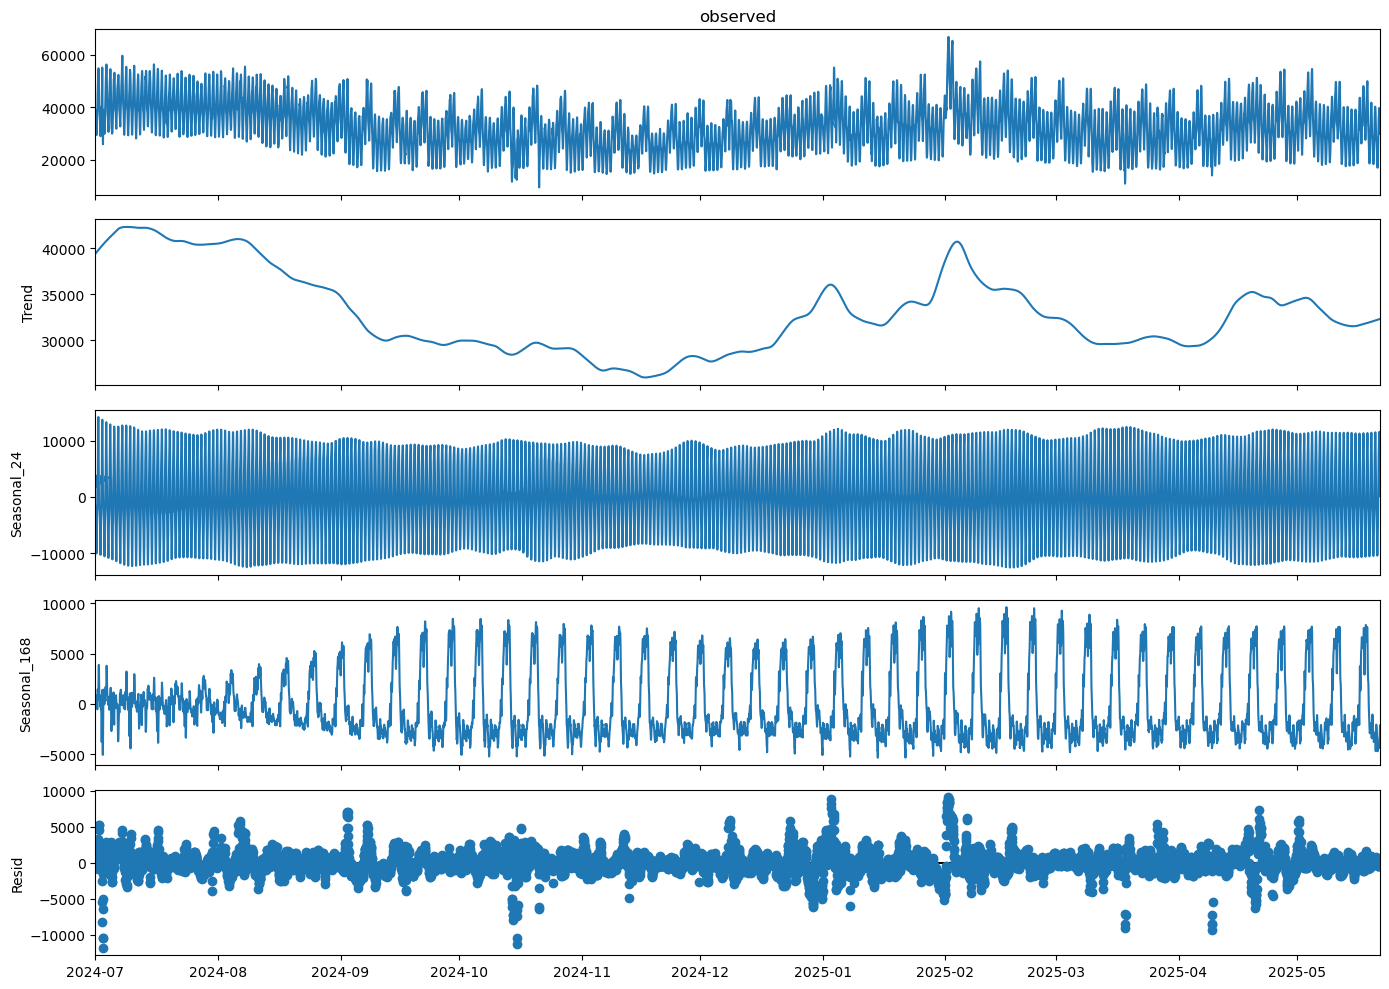

In [6]:
# First do on subset without nulls
df_ts = df.loc[df["Timestamp"] >= "2024-07-01"].set_index("Timestamp")
res = MSTL(df_ts["Peak Player Count"], periods=(24, 24*7)).fit()
fig = res.plot()
fig.set_size_inches(14, 10)
plt.tight_layout()
plt.show()

In [7]:
# Try repeating but impute

## Notes

- Hypixel was DDOS'd around June 18-19, 2021, leading to downtime. This was cross-referenced with Hypixel forums.
- Very good coverage, only missing <0.5% of the data.
- Very clear daily and weekly patterns, monthly isn't as clear and may not be as useful.
- A few outliers, might be from maintenance or special events.